<a href="https://colab.research.google.com/github/PradeepKumarM30/MachineLearningtechniques/blob/main/20MAI0030EX4/LogRegModifiedTarget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
cd sample_data/

/content/sample_data


# **Here The logistic Regression and naive bayes are done for the Sex as the target variable**

In [ ]:
#Load all the neccesary imports required for the project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataFrameForTitanicData = pd.read_csv('titanic_data.csv')

In [ ]:
dataFrameForTitanicData.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#transfer to dataframe   
train =  pd.read_csv('titanic_data.csv')

In [ ]:
#Assign the independent variables
df = train[['Survived','Pclass','Sex','Age','Fare','SibSp','Parch']]

In [ ]:
#Assign categorical values for the sex feature - encoding task
df['Sex'] = df['Sex'].apply(lambda sex:1 if sex == 'male' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['SibSp'] = df['SibSp'].fillna(df['SibSp'].median())
df['Parch'] = df['Parch'].fillna(df['Parch'].median())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#Glimpse of data
df.head()

,Survived,Pclass,Sex,Age,Fare,SibSp,Parch
0,0,3,1,22.0,7.2500,1,0
1,1,1,0,38.0,71.2833,1,0
2,1,3,0,26.0,7.9250,0,0
3,1,1,0,35.0,53.1000,1,0
4,0,3,1,35.0,8.0500,0,0


In [ ]:
#this utility makes the concept of spltinng very simple
from sklearn.model_selection import train_test_split

In [ ]:
#Setting the x and y variables
X = df.drop("Sex",axis = 1)
Y = df["Sex"]

In [ ]:
#train and test split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 25)

In [ ]:
#Logistic regression model fitting
from sklearn.linear_model import LogisticRegression 
logit = LogisticRegression()

In [ ]:
logit.fit(X_train,Y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#See the performance using a test set
Y_pred = logit.predict(X_test)


In [ ]:
error = np.sum((Y_pred - Y_test)^2)
print(error)

368


In [ ]:
#metrics for model evaluation and performance
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,classification_report
cnf = confusion_matrix(Y_test,Y_pred)

In [ ]:
metrics = pd.DataFrame(cnf)
metrics

,0,1
0,70,22
1,38,138


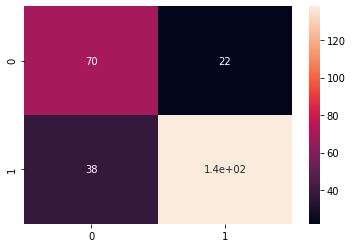

In [ ]:
import seaborn as sn
sn.heatmap(metrics,annot=True)

In [ ]:
accuracy_score(Y_test,Y_pred) * 100

77.61194029850746

In [ ]:
report = classification_report(Y_test,Y_pred)
print(report) 

              precision    recall  f1-score   support

           0       0.65      0.76      0.70        92
           1       0.86      0.78      0.82       176

    accuracy                           0.78       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.79      0.78      0.78       268



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)  

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
Y_pred = nb.predict(X_test)


In [ ]:
error = np.sum((Y_pred - Y_test)^2)
print(error)

371


In [ ]:
cnf = confusion_matrix(Y_pred,Y_test)
print(cnf)

[[ 62  39]
 [ 30 137]]


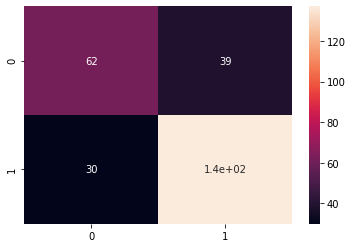

In [ ]:
metrics = pd.DataFrame(cnf)
sn.heatmap(metrics,annot=True)

In [ ]:
accuracy_score(Y_test,Y_pred) * 100

74.25373134328358

In [ ]:
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.67      0.64        92
           1       0.82      0.78      0.80       176

    accuracy                           0.74       268
   macro avg       0.72      0.73      0.72       268
weighted avg       0.75      0.74      0.75       268



# **Here We can clearly see that Logisitic regression is performing better than naive bayes where we used the Survived as the target variable in  previous example**